In [10]:
from GGMS.solvers import *
from GGMS.spd_generators import *
from GGMS.stat_funcs import *
from GGMS.experimenting import *
from GGMS.metrics import *
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import pickle

In [11]:
N = 20
n = 40
S_obs = 200
S_exp = 1000
density_params = [0.94, 0.87, 0.85, 0.77, 0.74, 0.68, 0.64, 0.55, 0.4] # 0.1 to 0.9
solvers = [SimInf(), Bonferroni(), Holm(), BenjaminiHochberg(), BenjaminiYekutieli()]
metrics = [FP, FN, FDR, TPR, F1]

In [12]:
def density_exp():
    density_frames = []
    for density_param in tqdm(density_params):
        final_exp_result = None
        for _ in range(S_exp):
            prec, cov, pc, ed, G = generate_chol_model(N, density_param, random_state=42)
            exp_result = perform_experiments_with_given_model(n, cov, G, S_obs, solvers, metrics, ranger=range).T
            if final_exp_result is not None:
                final_exp_result += exp_result
            else:
                final_exp_result = exp_result

        final_exp_result /= S_exp
        density_frames.append(final_exp_result)

    return density_frames

density_frames = density_exp()
with open(f'data/density_frames_dim{N}_obs{n}_chol_rep{S_obs * S_exp}.bin', 'wb') as f:
    pickle.dump(density_frames, f)

  0%|          | 0/9 [00:00<?, ?it/s]

KeyboardInterrupt: 

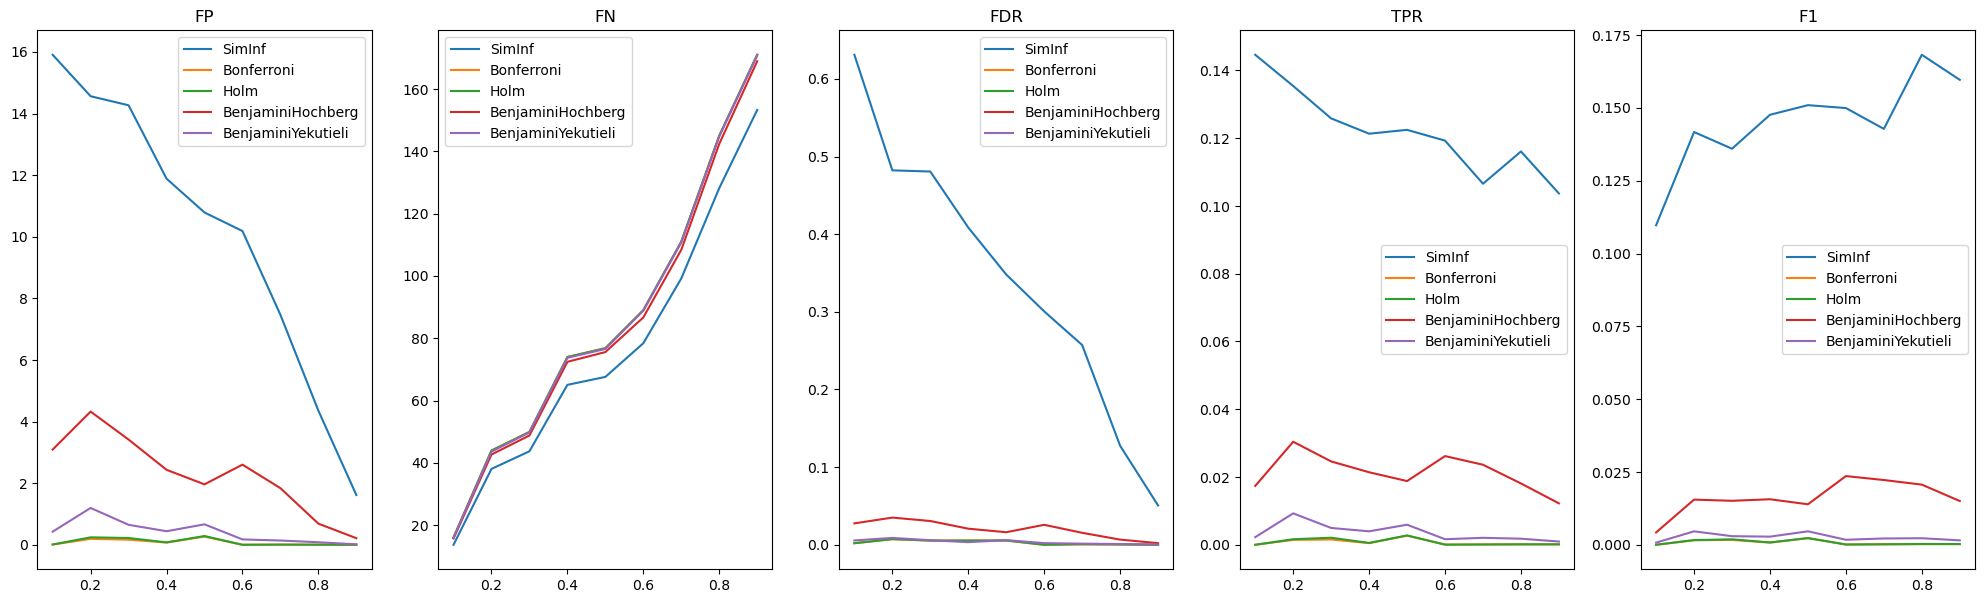

In [4]:
fig, axes = plt.subplots(1, 5)
axes = axes.flatten()
x = np.arange(0.1, 1, 0.1)

for idx, metric in enumerate(density_frames[0].columns):
    density_df = pd.concat([density_frame[metric] for density_frame in density_frames], axis=1).T
    density_df

    for method in density_frames[0].index:
        axes[idx].plot(x, density_df[method], label=method)
    axes[idx].legend()
    axes[idx].set_title(metric)
fig.set_size_inches((25, 7))